#Digital Image Processing

*   Use openCV for image processing tasks
*   Read Images
*   Crop Image
*   Image Flitering
*   Edge Detection

  

 **Reading an image**

1.Load and display an image.
Print the shape of the image.

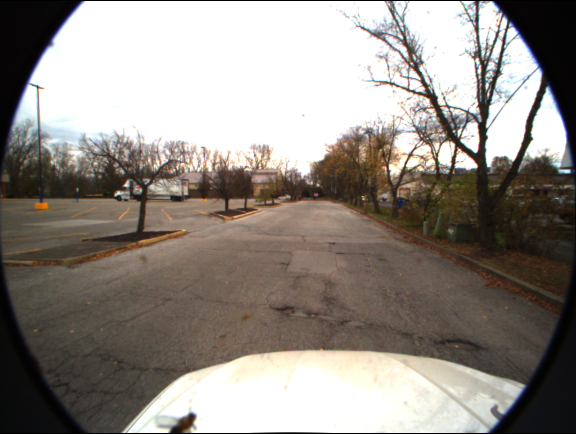

Shape of the image(434, 576, 3)


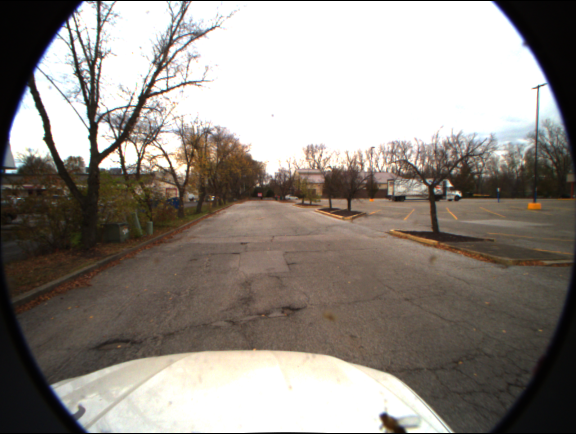

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#Reading & Displaying an image
image = cv2.imread('/content/rgb1.png')
cv2_imshow(image)
print("Shape of the image" + str(image.shape))

#Flipping the image
flipped_image = cv2.flip(image, 1)
cv2_imshow(flipped_image)

# Get the height and width of the image
height, width = image.shape[:2]

 **Resizing an image**
3. Read an image, print the size of an image and resize the image to any of the smaller dimensions like 256*256 and display the resized image

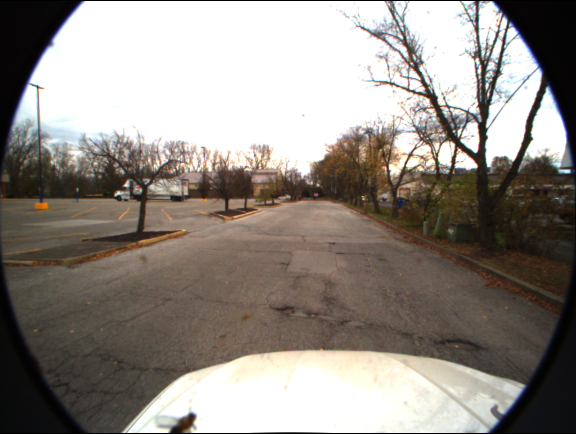

Original Image (434, 576, 3)


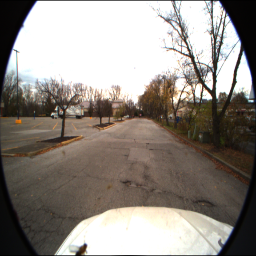

Resized Image (256, 256, 3)


In [4]:
#Reading an image
cv2_imshow(image)
#Size of the image
print('Original Image',image.shape)
img_resized = cv2.resize(image,(256,256))

#Size of the image
cv2_imshow(img_resized)
print('Resized Image',img_resized.shape)

 **Cropping an image**
 4. Read an image, crop a portion of the image and display the cropped image

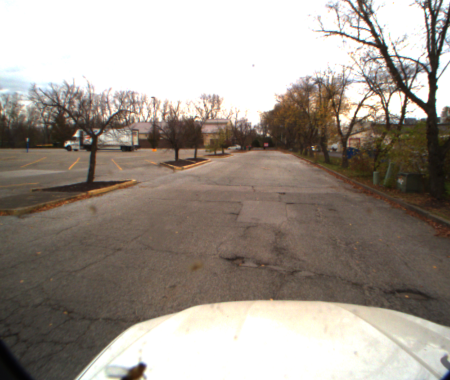

Top-left corner: (50, 50)
Width: 450
Height: 380


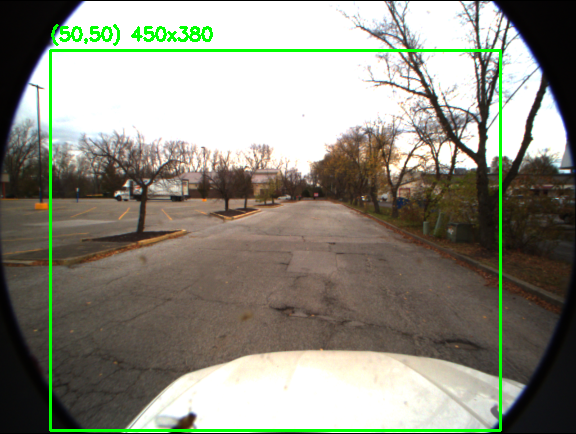

In [5]:
# Define crop coordinates (x, y, width, height)
x, y = 50, 50      # Top-left corner
w, h = 450, 380     # Width and height
# Perform cropping
cropped_image = image[y:y+h, x:x+w]

# Display cropped image
cv2_imshow(cropped_image)

clone = image.copy()


# Print the crop info
print(f"Top-left corner: ({x}, {y})")
print(f"Width: {w}")
print(f"Height: {h}")

# Draw the rectangle and label
cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
label = f"({x},{y}) {w}x{h}"
cv2.putText(clone, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the result
cv2_imshow(clone)

**Sharpen the image**

Applying a sharpening kernel. This kernel emphasizes differences between neighboring pixels (edges)

The center value (5) boosts the current pixel, while the (-1) subtract from the surrounding pixels

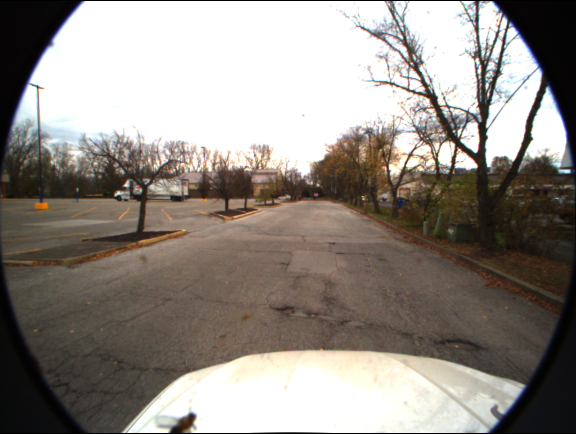

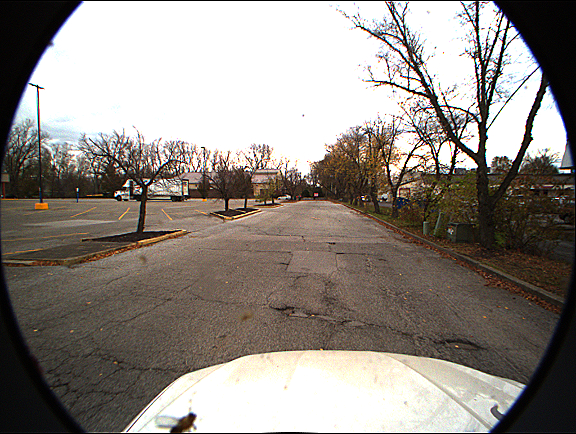

In [16]:
# Define a sharpening kernel
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5,-1],
    [0, -1, 0]
])

# Apply the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, sharpen_kernel)


# Optional: Display the images
cv2_imshow(image)
cv2_imshow(sharpened)


**Blur the image**

**Average Blur:** It replaces each pixel with the average value of its neighboring pixels. This reduces high frequency noise and smoothens the image.

**Gaussian Blur:** We use a Gaussian kernel for convolution. Here center pixels are given highest weightage and the importance/weightage redcues as we move away from the center.

**Median Blur:** It replaces each pixel with the median value of its neighbouring pixels within a specified kernel. It is efficient in removing salt and pepper noise.



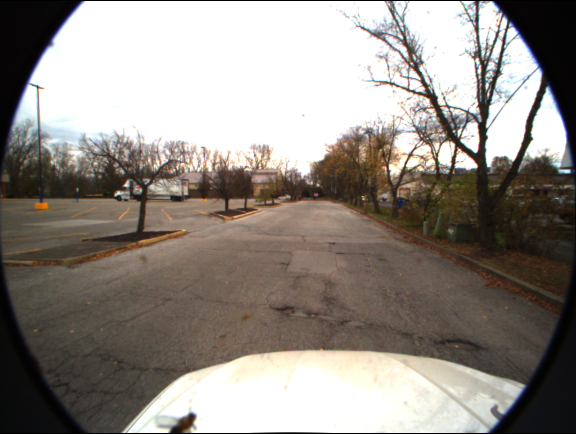

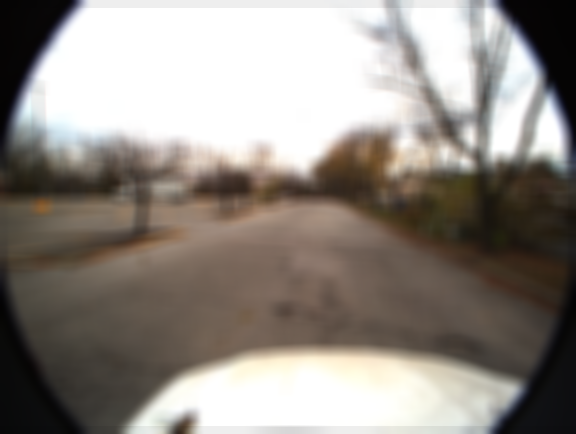

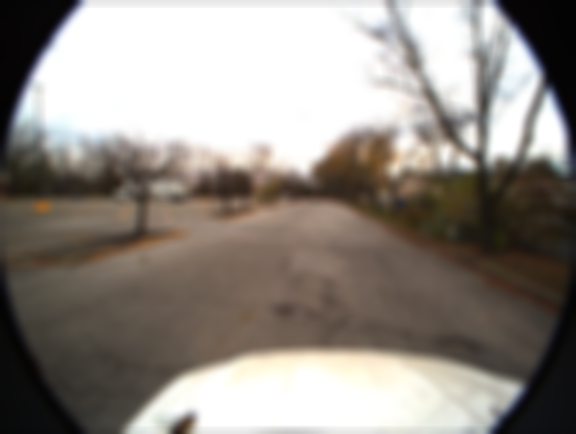

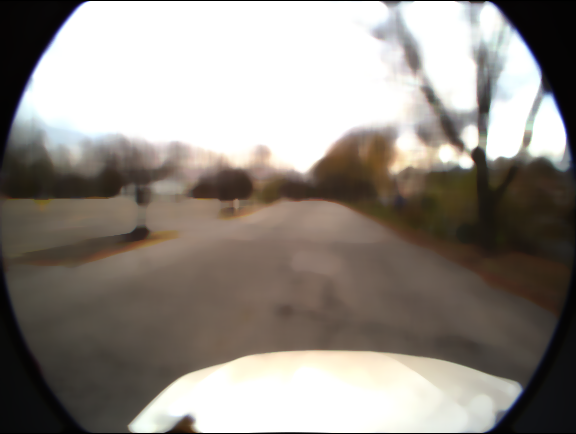

In [15]:
kernel_size = 15
img_blur = cv2.blur(image, (kernel_size, kernel_size)) # Average Blur
img_gaussian_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 5) # Gaussian Blur
img_median_blur = cv2.medianBlur(image, kernel_size) # Median Blur

cv2_imshow(image)
cv2_imshow(img_blur)
cv2_imshow(img_gaussian_blur)
cv2_imshow(img_median_blur)

Edge Detection

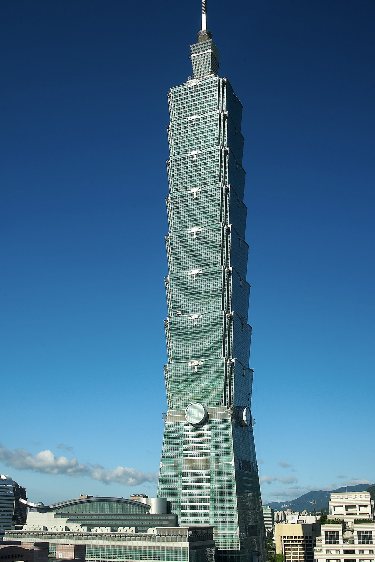

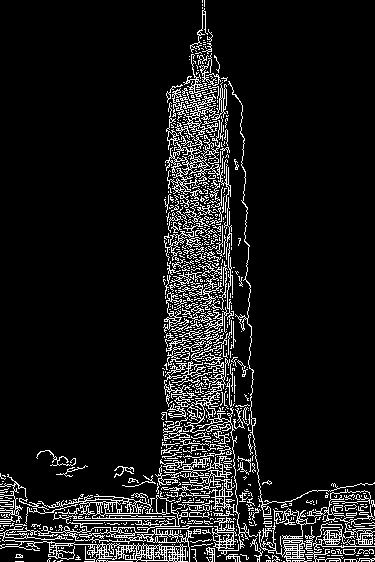

In [30]:
image = cv2.imread('/content/Taipei-101.jpg')
h, w = image.shape[:2]
imge_resized = cv2.resize(image,(w//4,h//4))

# Convert RGB image to grayscale
gray = cv2.cvtColor(imge_resized, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Show images
cv2_imshow(imge_resized)   # Original
cv2_imshow(edges)          # Edges (Canny)


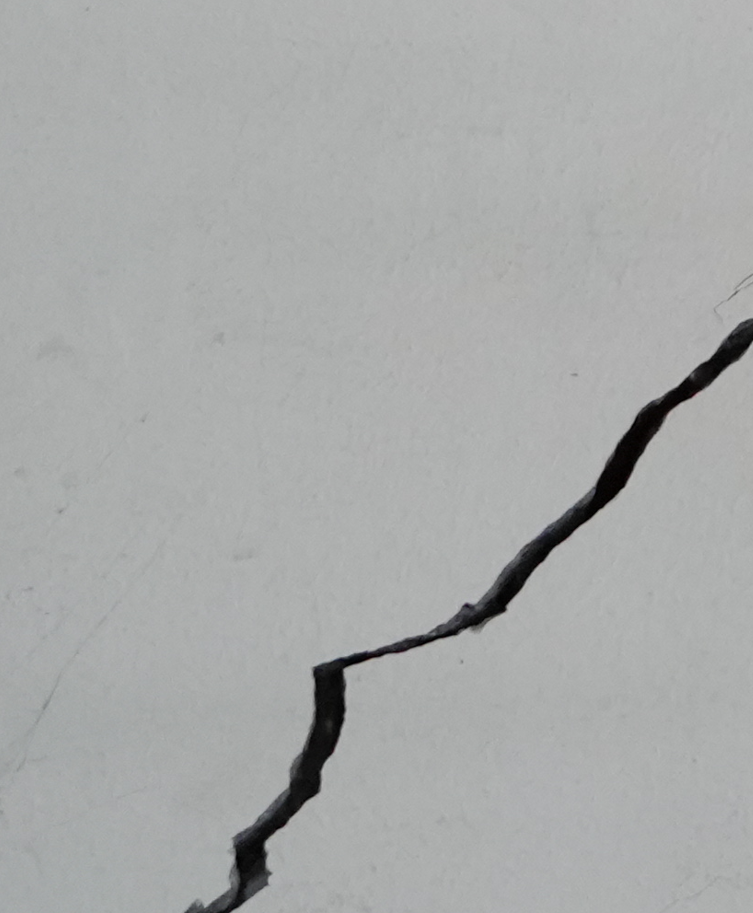

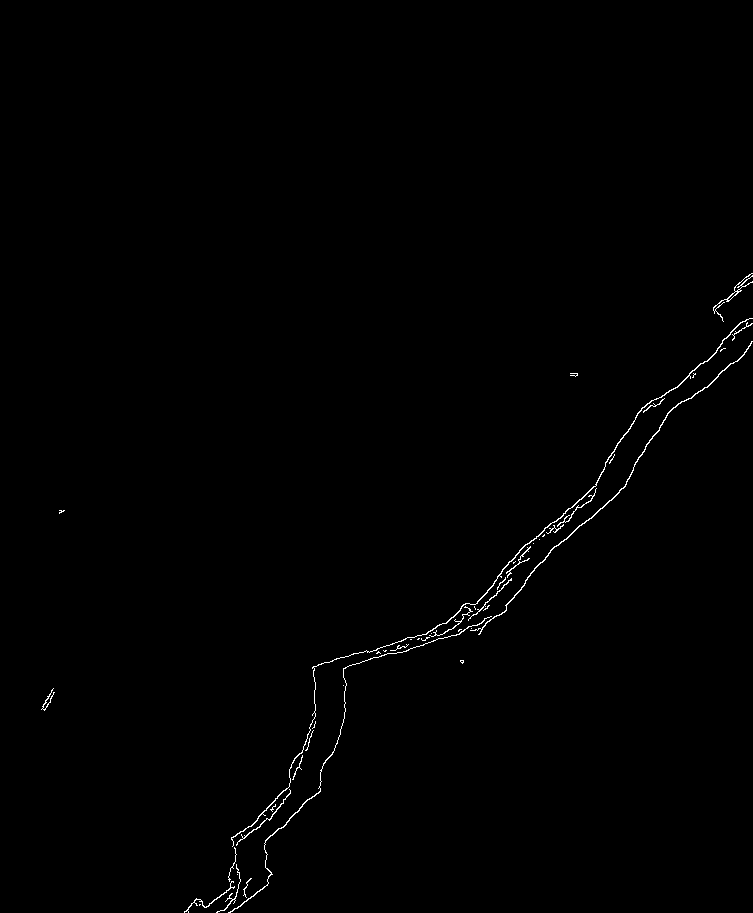

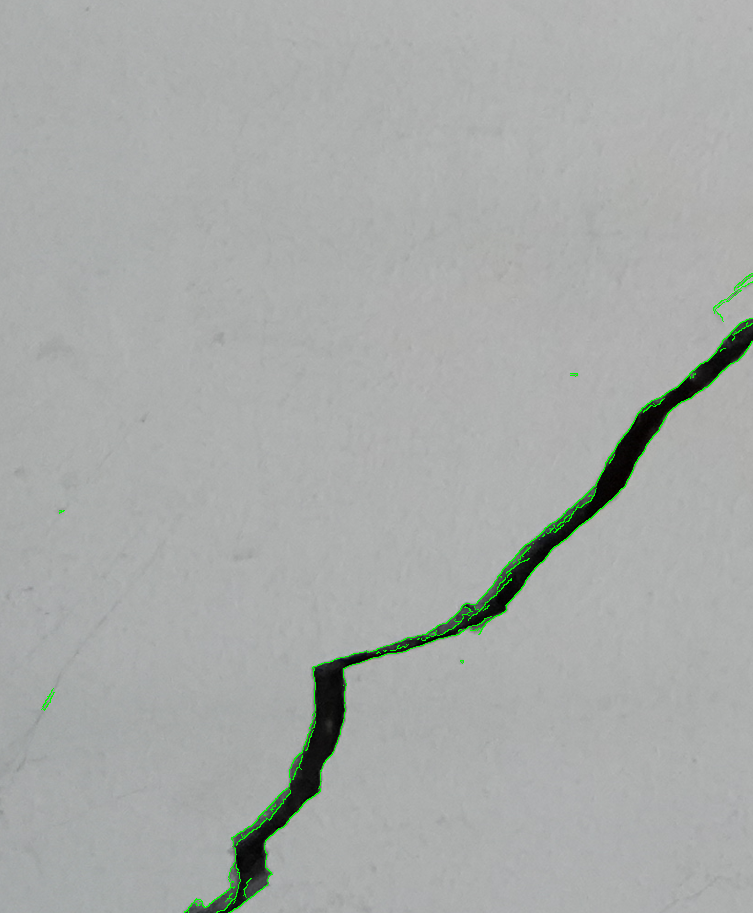

In [32]:
image = cv2.imread('/content/crack.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours directly from Canny output
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)

# Show images
cv2_imshow(image)          # Original
cv2_imshow(edges)          # Edges (Canny)
cv2_imshow(contour_image)  # Crack shape (green outline)

**Thresholding an image**

8.Download an image with an object, apply binary threshold and display the image.

Apply Adaptive Threshold and display the image.

Describe binary threshold and adaptive threshold in 2 sentences for each type.

**Simple Thresholding:** It involves selecting a single threshold value that is applied uniformly to the entire image. Each pixel is compared with the threshold value and seperated as foreground and background. It is useful when the image has uniform lighting and a single threshold can effectively seperate objects from background.


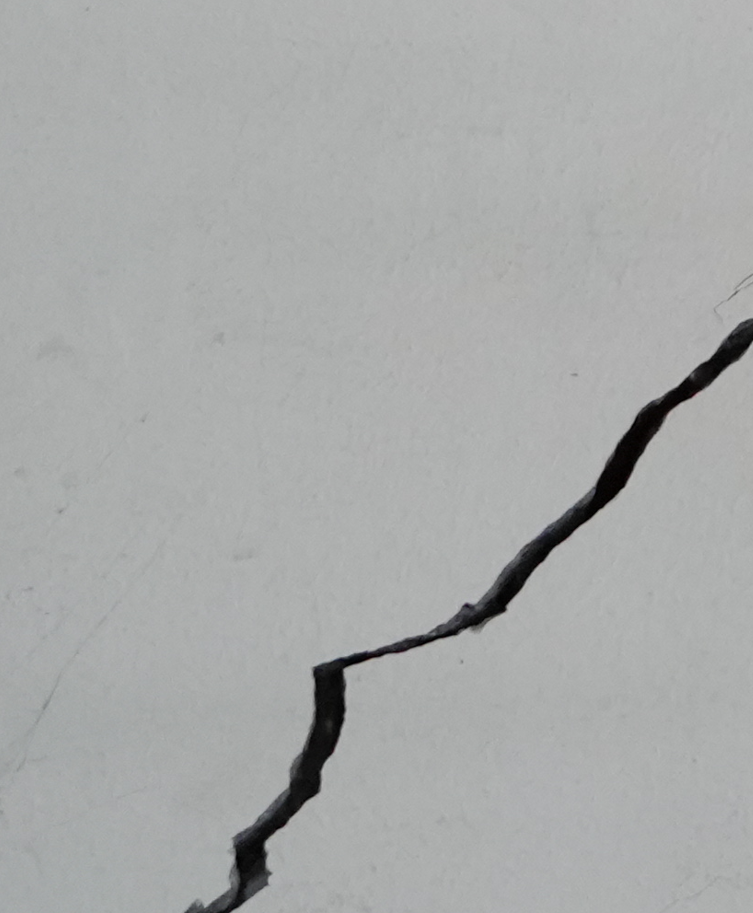

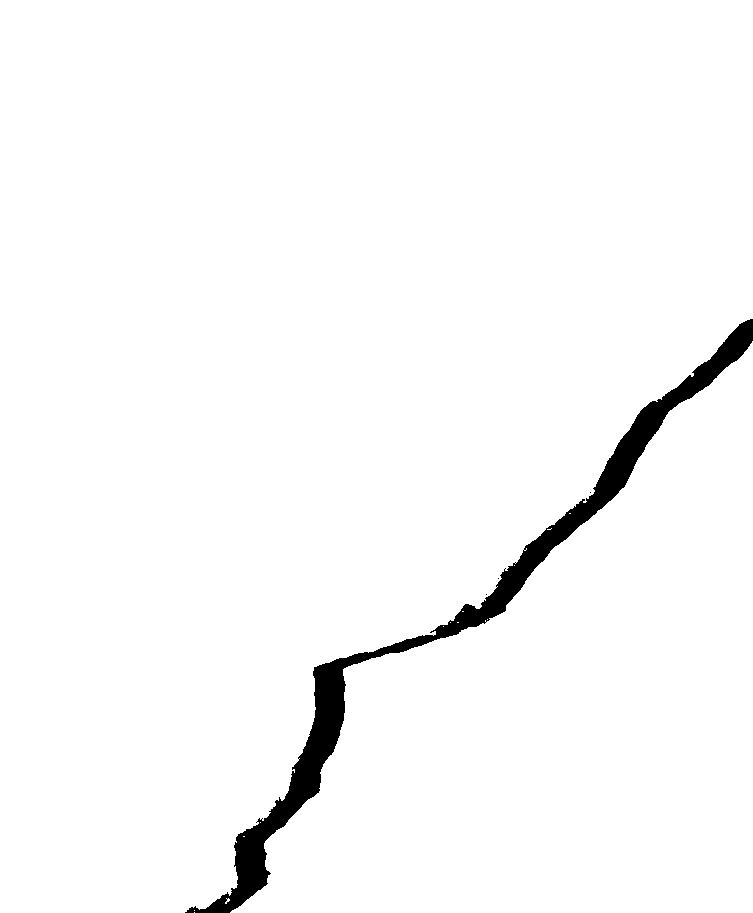

In [ ]:
image_crack = cv2.imread('/content/crack.png')
img_gray = cv2.cvtColor(image_crack, cv2.COLOR_BGR2GRAY)

ret, simple_thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY)

cv2_imshow(image_crack)
cv2_imshow(simple_thresh)


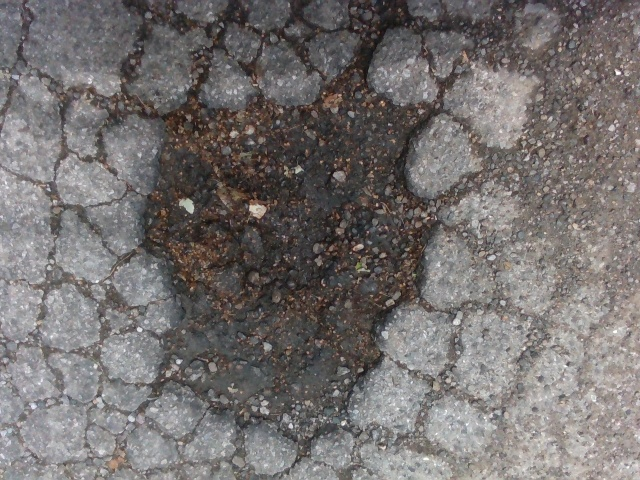

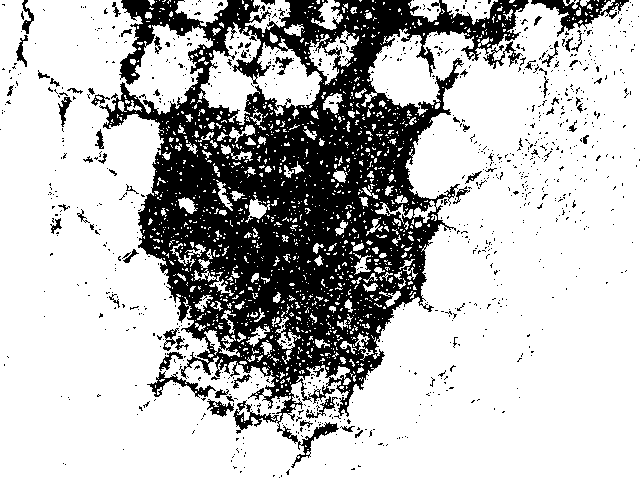

In [33]:
image_crack = cv2.imread('/content/pothole.jpg')
img_gray = cv2.cvtColor(image_crack, cv2.COLOR_BGR2GRAY)

ret, simple_thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY)

cv2_imshow(image_crack)
cv2_imshow(simple_thresh)

**Fun Work**

Please use the attached image **walldamage.jpg** for this task.

Using the OpenCV functions demonstrated above, apply appropriate computer vision techniques to detect the damages on the wall.

Your goal is to highlight the demaged area clearly using the tools we have explored.

In [ ]:
# Start you code here